# Проверка статистических гипотез. Параметрические критерии.
## Методика проверки статистических гипотез

#### 1. Сформулировать нулевую гипотезу $H_0$ и альтернативную - $H_1$ (Гипотеза $H_0$ формулируется исходя из требований прикладной задачи. Иногда альтернатива не формулируется в явном виде; тогда предполагается, что $H_1$ означает «не $H_0$»).
#### 2. Сформулировать статистические допущения о распределении выборки.
#### 3. Выбрать тестовую статистику, которая отражает характер допущений.
#### 4. Зафиксировать уровень значимости $1 \le \alpha \le 0$.
#### 5. Рассчитать наблюдаемое значение выбранной статистики.
#### 6. Сдалать вывод о гипотезе $H_0$:
   6.1 На основе критической области $\Omega_\alpha$
   
   6.2 На основе достигаемого уровня значимости (p-value)


## p-value
Достигаемый уровень значимости (p-value) — это наименьшая величина уровня значимости, при которой нулевая гипотеза отвергается для данного значения статистики критерия T:$$p(T) = min \{\alpha: T \in \Omega_\alpha \}$$

## Критические области
Пусть $x_\alpha$ - квантиль уровня-$\alpha$ функции распределения $F$ статистики $T$: $F(x_\alpha) = \alpha$. Здесь $F(t) = P(T<t)$
1. Левосторонняя критическая область:

Определяется интервалом: $\Omega_\alpha \in \{-\infty, x_\alpha \}$

p-value: $P(T) = F(T)$

2. Правосторонняя критическая область:

Определяется интервалом: $\Omega_\alpha \in \{x_{1-\alpha}, \infty \}$

p-value: $P(T) = 1-F(T)$

3. Двухсторонняя критическая область:

Определяется интервалом: $\Omega_\alpha \in \{-\infty, x_{\alpha/2} \}U\{x_{1-\alpha/2}, \infty \}$

p-value: $P(T) = min\{2F(T), 2(1-F(T))\}$

## Ошибки первого и второго рода

1. Ошибка первого рода («ложная тревога»)  — когда нулевая гипотеза отвергается, хотя на самом деле она верна. Вероятность ошибки первого рода:$$\alpha = P\{T \in \Omega_\alpha | H_0\}$$
2. Ошибка второго рода («пропуск цели»)  — когда нулевая гипотеза принимается, хотя на самом деле она не верна. Вероятность ошибки второго рода:$$\beta = P\{T \notin \Omega_\alpha | H_1\}$$
Мощность критерия $1-\beta(H) = P\{T \in \Omega_\alpha | H\}$ - вероятность отклонить гипотезу $H_0$, если на самом деле верна альтернативная гипотеза $H$. (Мощность критерия является числовой функцией от альтернативной гипотезы $H$)

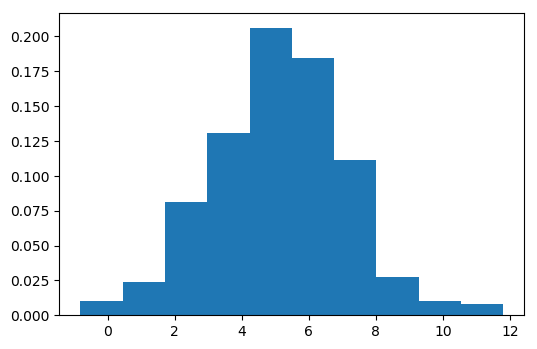

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

default_dpi = mpl.rcParamsDefault['figure.dpi']
factor = 1
mpl.rcParams['figure.dpi'] = default_dpi * factor

X = np.random.randn(400)

X = 5.0+X*2

plt.hist(X, bins=10, density = 1);

# T-test

Дано: $X_1, ..., X_n \sim N$ 

$$H_0: \mu = a $$ $$H_1: \mu > a$$

$$\frac{\sqrt{n}*(\bar{X}-a)}{S} \sim t(n-1)$$


In [8]:
print(len(X))
X_mean = np.mean(X);
print(X_mean)
Std = np.std(X);
print(Std)
print('_'*40)

alpha = 0.05;
a = 5.5;

St = np.sqrt(len(X))*(X_mean-a)/Std
print('Stat = ', St)
Krit = st.t.ppf(0.95, len(X)-1)
print('\nkrit = ', Krit)
print('p-value = ', st.t.sf(St, len(X)-1))


400
5.117162071286959
1.9867526877752069
________________________________________
Stat =  -3.8539062367319428

krit =  1.6486815335554057
p-value =  0.9999322831537335


$$H_0: \mu = a $$ $$H_1: \mu < a$$

In [9]:
Krit = st.t.ppf(0.05, len(X)-1)
print('krit = ', Krit)
print('p-value = ', st.t.cdf(St, len(X)-1))

krit =  -1.6486815335554064
p-value =  6.771684626650694e-05


$$H_0: \mu = a $$ $$H_1: \mu \neq a$$

In [10]:

print('krit = [', st.t.ppf(0.025, len(X)-1),',',st.t.ppf(0.975, len(X)-1),']')

print('p-value = ', min(2.0*st.t.cdf(St, len(X)-1), 2.0*(1.0-st.t.cdf(St, len(X)-1))))


krit = [ -1.9659272959208094 , 1.965927295920809 ]
p-value =  0.0001354336925330139


In [11]:
st.ttest_1samp(X, a)

Ttest_1sampResult(statistic=-3.8490858393023095, pvalue=0.00013802845173084793)

In [12]:
#Построим доверительный интервал
X_mean-(Std*st.t.ppf(0.975, len(X)-1))/np.sqrt(len(X)), X_mean+(Std*st.t.ppf(0.975, len(X)-1))/np.sqrt(len(X))

(4.921871504329894, 5.312452638244024)

## Двувыборочный случай

### Критерий сдвига

1. Неизвестная разница мат. ожиданий при неизвестных, но не равных дисперсиях

Дано: $$X_1, ..., X_{n_1} \sim N(\mu_1, \sigma_1^2)$$
$$Y_1, ..., Y_{n_2} \sim N(\mu_2, \sigma_2^2)$$
$X$ и $Y$  - независимы, $\sigma_1 != \sigma_2$ 
$$H_0: \mu_1-\mu_2 = \theta $$ $$H_1: \mu_1-\mu_2 \neq \theta$$
Центральная статистика имеет вид: $$\frac{\bar{X}-\bar{Y}-\theta}{\sqrt{S_1^2/n_1+S_2^2/n_2}} \sim t(k)$$.
$$k=\frac{(s_1^2/n_1+s_2^2/n_2)^2}{(s_1^2/n_1)^2/(n_1-1)+(s_2^2/n_2)^2/(n_2-1)}$$


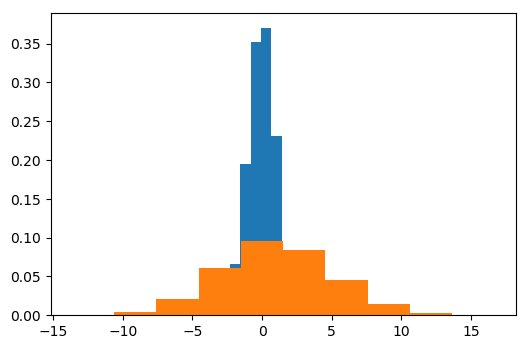

In [13]:
def df(X_1, X_2):
    n_1 = len(X_1);
    n_2 = len(X_2);
    s_1 = (sum((X_1-np.mean(X_1))**2))/(n_1-1.0)#np.var(X_1);
    s_2 = (sum((X_2-np.mean(X_2))**2))/(n_2-1.0)#np.var(X_2);
    
    k = (((s_1/n_1)+(s_2/n_2))**2)/((((s_1/n_1)**2)/(n_1-1)) + (((s_2/n_2)**2)/(n_2-1)));
    
    return k;

Y = np.random.randn(22000);
X = np.random.randn(17000);
X = 4.0*X+1.0

plt.hist(Y, bins=10, density = 1);
plt.hist(X, bins=10, density = 1);


In [14]:
theta = 1.0;

x_mean = np.mean(X);
S_1 = (sum((X-np.mean(X))**2))/(len(X)-1.0);
print('x_mean = ', x_mean, 'S1^2 = ', S_1, 'n1 = ', len(X));

y_mean = np.mean(Y);
S_2 = (sum((Y-np.mean(Y))**2))/(len(Y)-1.0);
print('y_mean = ', y_mean, 'S2^2 = ', S_2, 'n2 = ', len(Y));

St = (x_mean-y_mean-theta)/np.sqrt((S_1/len(X))+(S_2/len(Y)))
print('St = ', St);

k = int(df(X, Y));
print('k = ', k);

print('_'*40);
print('Krit1 = ', st.t.ppf(0.025, k));
print('Krit2 = ', st.t.ppf(0.975, k));

x_mean =  1.0228160253683112 S1^2 =  15.855067558934968 n1 =  17000
y_mean =  -0.004926385555450777 S2^2 =  1.0075984025094464 n2 =  22000
St =  0.8869000274961849
k =  18674
________________________________________
Krit1 =  -1.9600910286861146
Krit2 =  1.9600910286861142


2. Неизвестная разница мат. ожиданий при неизвестных, но равных дисперсиях

Дано: $$X_1, ..., X_{n_1} \sim N(\mu_1, \sigma_1^2)$$
$$Y_1, ..., Y_{n_2} \sim N(\mu_2, \sigma_2^2)$$
$X$ и $Y$  - независимы, $\sigma_1 = \sigma_2$ 
$$H_0: \mu_1-\mu_2 = \theta $$ $$H_1: \mu_1-\mu_2 \neq \theta$$
Центральная статистика имеет вид: $$\frac{\bar{X}-\bar{Y}-\theta}{S_x\sqrt{1/n_1+1/n_2}} \sim t(n_1+n_2-2)$$.
$$S_x^2=\frac{(s_1^2(n_1-1)+s_2^2(n_2-1))}{n_1+n_2-2}$$

## Проверка гипотез про равенство дисперсий

Дано: $$X_1, ..., X_n \sim N(\mu_1, \sigma_1^2)$$
$$Y_1, ..., Y_m \sim N(\mu_2, \sigma_2^2)$$
$X$ и $Y$  - независимы, требуется проверить гипотезу $H_0: \sigma_1 = \sigma_2$

Сначала считаем выборочные дисперсии:
$$\widehat{\sigma_1}=\frac{1}{n-1}*\sum_{i=1}^{n}(X_i-\bar{X})^2$$
$$\widehat{\sigma_2}=\frac{1}{m-1}*\sum_{i=1}^{m}(Y_i-\bar{Y})^2$$

Cтатистика: $$F=\widehat{\sigma_1}/\widehat{\sigma_2} \sim F(n-1, m-1)$$

In [15]:
Y = np.random.randn(220);
X = np.random.randn(170);
X = 1*X


x_mean = np.mean(X);
S_1 = (sum((X-np.mean(X))**2))/(len(X)-1.0);
n = len(X);
print('x_mean = ', x_mean, 'S1^2 = ', S_1, 'n1 = ', n);

y_mean = np.mean(Y);
S_2 = (sum((Y-np.mean(Y))**2))/(len(Y)-1.0);
m = len(Y);
print('y_mean = ', y_mean, 'S2^2 = ', S_2, 'n2 = ', m);

St = S_2/S_1;

print('St = ', St)

print('_'*40);
print('Krit1 = ', st.f.ppf(0.025, n-1, m-1));
print('Krit2 = ', st.f.ppf(0.975, n-1, m-1));


x_mean =  -0.11588172693617513 S1^2 =  0.9055692161685436 n1 =  170
y_mean =  0.07946916065118169 S2^2 =  0.9731423859040783 n2 =  220
St =  1.074619552574276
________________________________________
Krit1 =  0.7502829498612917
Krit2 =  1.3258009925480954


# Критерии согласия.

## Критерий соласия $\chi^2$ Пирсона

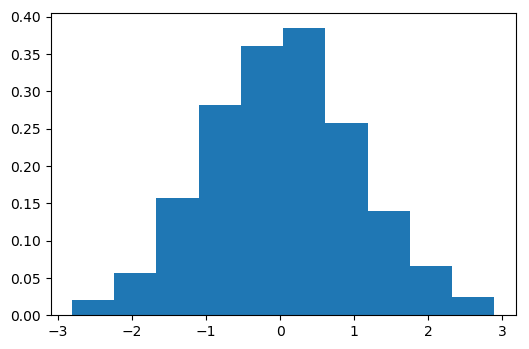

In [16]:
Y = np.random.randn(1000);
plt.hist(Y, bins=10, density = 1);

In [17]:
k = 15
N = len(Y)
print(N)

grid = np.linspace(min(Y), max(Y), k)
print(grid)

#строим статистический ряд
f_obs = np.zeros(k-1)

for i in range(k-1):
    for j in range(N):
        if Y[j] == grid[i] and i == 0:
            f_obs[i] = f_obs[i] + 1.0
        elif (Y[j] > grid[i] and Y[j] <= grid[i+1]):
            f_obs[i] = f_obs[i] + 1.0
            
print(f_obs)
#f_obs =f_obs/N;
#print(f_obs)
print(np.sum(f_obs));

#for i in range(k-1):
#    x_i[i] = grid[i+1] - grid[i];

    
f_exp = np.zeros(k-1);


for i in range(k-1):
    f_exp[i] = N*(st.norm.cdf(grid[i+1]) - st.norm.cdf(grid[i]));#z.cfd(grid[i+1]) - z.cfd(grid[i])
 
print(f_exp)

print('\n',st.chisquare(f_obs, f_exp), '\n', '_'*40)

St = 0.0;

for i in range(k-1):
    St = St + ((f_obs[i]-f_exp[i])**2)/f_exp[i]

print('Stat = ', St)
print('Krit1 = ', st.chi2.ppf(0.025, k-1))
print('Krit2 = ', st.chi2.ppf(0.975, k-1))



1000
[-2.81565313 -2.40775411 -1.99985509 -1.59195607 -1.18405704 -0.77615802
 -0.368259    0.03964003  0.44753905  0.85543807  1.2633371   1.67123612
  2.07913514  2.48703417  2.89493319]
[  6.  15.  35.  61.  92. 132. 160. 163. 128.  89.  64.  34.  12.   9.]
1000.0
[  5.59158419  14.73246322  32.93933136  62.4979534  100.63260339
 137.512217   159.46988039 156.94710817 131.08861277  92.92030677
  55.89650561  28.53505878  12.361814     4.54445516]

 Power_divergenceResult(statistic=8.234750549276457, pvalue=0.8279774100210414) 
 ________________________________________
Stat =  8.234750549276457
Krit1 =  5.628726103039734
Krit2 =  26.11894804503737


## Критерий нормальности Шапиро-Уилки (Shapiro-Wilk)

In [18]:
#X = np.random.rand(5000);
#X = np.random.randn(50);
st.shapiro(Y)

(0.9984213709831238, 0.5043382048606873)

## Статистическая проверка наличия корреляции. Коэффициент корреляции Пирсона

$$r_{xy} = \frac {\sum_{i=1}^{m} \left( x_i-\bar{x} \right)\left( y_i-\bar{y} \right)}{\sqrt{\sum_{i=1}^{m} \left( x_i-\bar{x} \right)^2 \sum_{i=1}^{m} \left( y_i-\bar{y} \right)^2}} = \frac {cov(x,y)}{\sqrt{s_x^2 s_y^2}}$$

$|r_{xy} | =1 $ x, y линейно зависимы, 

$r_{xy}=0 $ x, y линейно независимы

(0.0018156510434194505, 0.897868894276343)
(1.0, 0.0)


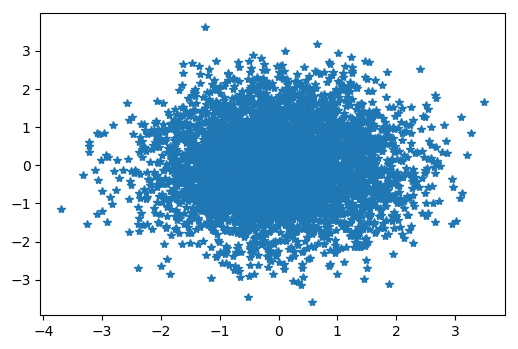

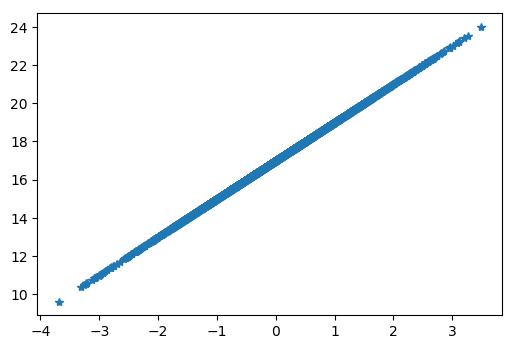

In [19]:
X = np.random.randn(5000);
Y = np.random.randn(5000);

print(st.pearsonr(X, Y))
plt.plot(X, Y, '*');


Y = 2.0*X + 17

print(st.pearsonr(X, Y))
plt.figure()
plt.plot(X, Y, '*');

$$H_0: r_{xy} = 0$$

$$T = \frac{r_{xy}\sqrt{n-2}}{\sqrt{1-r^2_{xy}}} \sim t_{n-2}$$ $T \in [t_\alpha,t_{1-\alpha}]$